In [2]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
start_d = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_d = pd.Timestamp("2023-03-31", tz="America/New_York").isoformat()

tickers = ["AXP", "RIO"]

timeframe = "1Month"

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_d,
    end = end_d
).df
df_portfolio.drop('trade_count', axis=1, inplace=True)
df_portfolio.drop('vwap', axis=1, inplace=True)

df_portfolio = df_portfolio.drop(columns=["open","high","low","volume"])

AXP = df_portfolio[df_portfolio['symbol']=='AXP'].drop('symbol', axis=1)
RIO = df_portfolio[df_portfolio['symbol']=='RIO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AXP, RIO], axis=1, keys=['AXP','RIO'])

# check for NaN values
df_portfolio.dropna()

# Preview DataFrame
df_portfolio

,AXP,RIO
,close,close
timestamp,,
2022-01-01 05:00:00+00:00,179.82,71.40
2022-02-01 05:00:00+00:00,194.54,78.58
2022-03-01 05:00:00+00:00,187.00,80.40
2022-04-01 04:00:00+00:00,174.71,71.12
2022-05-01 04:00:00+00:00,168.82,73.44
2022-06-01 04:00:00+00:00,138.62,61.00
2022-07-01 04:00:00+00:00,154.02,61.03
2022-08-01 04:00:00+00:00,152.00,56.29


In [6]:
training_df = df_portfolio.loc["2022-01-01 05:00:00" : "2022-12-31 05:00:00"]
training_df

,AXP,RIO
,close,close
timestamp,,
2022-01-01 05:00:00+00:00,179.82,71.40
2022-02-01 05:00:00+00:00,194.54,78.58
2022-03-01 05:00:00+00:00,187.00,80.40
2022-04-01 04:00:00+00:00,174.71,71.12
2022-05-01 04:00:00+00:00,168.82,73.44
2022-06-01 04:00:00+00:00,138.62,61.00
2022-07-01 04:00:00+00:00,154.02,61.03
2022-08-01 04:00:00+00:00,152.00,56.29


In [7]:
testing_df = df_portfolio.loc["2023-01-01 05:00:00" : "2023-03-31 04:00:00"]
testing_df

,AXP,RIO
,close,close
timestamp,,
2023-01-01 05:00:00+00:00,174.93,79.35
2023-02-01 05:00:00+00:00,173.99,69.73
2023-03-01 05:00:00+00:00,164.95,68.60


<AxesSubplot:xlabel='timestamp'>

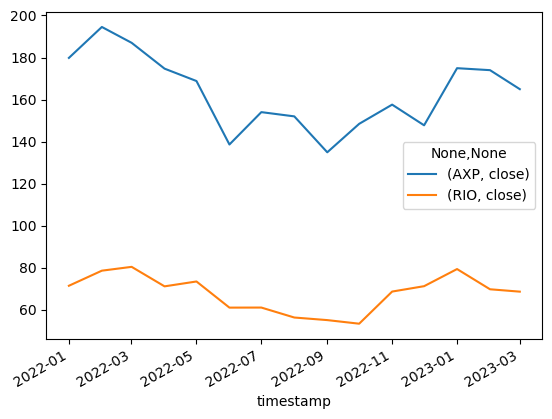

In [8]:
df_portfolio.plot()

In [9]:
df_portfolio["AXP Actual Returns"] = df_portfolio["AXP"]["close"].pct_change()
df_portfolio["RIO Actual Returns"] = df_portfolio["RIO"]["close"].pct_change()
df_portfolio.head()

,AXP,RIO,AXP Actual Returns,RIO Actual Returns
,close,close,,
timestamp,,,,
2022-01-01 05:00:00+00:00,179.82,71.40,NaN,NaN
2022-02-01 05:00:00+00:00,194.54,78.58,0.081860,0.100560
2022-03-01 05:00:00+00:00,187.00,80.40,-0.038758,0.023161
2022-04-01 04:00:00+00:00,174.71,71.12,-0.065722,-0.115423
2022-05-01 04:00:00+00:00,168.82,73.44,-0.033713,0.032621


In [10]:
short_window = 2
long_window = 4
df_portfolio["AXP SMA_Fast"] = df_portfolio["AXP"]["close"].rolling(window=short_window).mean()
df_portfolio["RIO SMA_Fast"] = df_portfolio["RIO"]["close"].rolling(window=short_window).mean()
df_portfolio["AXP SMA_Slow"] = df_portfolio["AXP"]["close"].rolling(window=long_window).mean()
df_portfolio["RIO SMA_Slow"] = df_portfolio["RIO"]["close"].rolling(window=long_window).mean()

df_portfolio.dropna(inplace=True)

In [11]:
Tracy_df = df_portfolio
Tracy_df.head()

,AXP,RIO,AXP Actual Returns,RIO Actual Returns,AXP SMA_Fast,RIO SMA_Fast,AXP SMA_Slow,RIO SMA_Slow
,close,close,,,,,,
timestamp,,,,,,,,
2022-04-01 04:00:00+00:00,174.71,71.12,-0.065722,-0.115423,180.855,75.760,184.0175,75.3750
2022-05-01 04:00:00+00:00,168.82,73.44,-0.033713,0.032621,171.765,72.280,181.2675,75.8850
2022-06-01 04:00:00+00:00,138.62,61.00,-0.178889,-0.169390,153.720,67.220,167.2875,71.4900
2022-07-01 04:00:00+00:00,154.02,61.03,0.111095,0.000492,146.320,61.015,159.0425,66.6475
2022-08-01 04:00:00+00:00,152.00,56.29,-0.013115,-0.077667,153.010,58.660,153.3650,62.9400
